Exercise 5 - Logistic Regression
=====

Logistic regression predicts binary (yes/no) events. For example, we may want to predict if someone will arrive at work on time, or if a person shopping will buy a product. 

This exercise will demonstrate simple logistic regression: predicting an outcome from only one feature.

Step 1
-----

We want to place a bet on the outcome of the next football (soccer) match. It is the final of a competition, so there will not be a draw. We have historical data about our favourite team playing in matches such as this. Complete the exercise below to preview our data.

### In the cell below replace:
#### 1. `&lt;addfilepath&gt;` with `'Data/football data.txt' ` (including the quotation marks)
#### 2. `&lt;printdatahere&gt;` with `print(dataset.head())`

#### and then __run the code__.&lt;/printdatahere&gt;&lt;/addfilepath&gt;

In [8]:
# This part sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'
import pandas as pd


###
# REPLACE <addFilePath> BELOW WITH 'Data/football data.txt' (INCLUDING THE QUOTES) TO LOAD THE DATA FROM THAT FILE
###
dataset = pd.read_csv('Data/football data.txt', index_col = False, sep = '\t', header = 0)
###

###
dataset.head()
###


,average_goals_per_match,won_competition
0,2.422870,1
1,2.824478,1
2,0.571688,0
3,1.055028,0
4,0.394192,0


This data shows the average goals per match of our team for that season in the left column. In the right column it lists a 1 if our team won the competition or a 0 if they did not.

Step 2
----

Let's graph the data so we have a better idea of what's going on here. Complete the exercise below to make an x-y scatter plot.

### In the cell below replace:
#### 1. `&lt;addwoncompetition&gt;` with `'won_competition'`
#### 2. `&lt;addaveragegoals&gt;` with `'average_goals_per_match'`
#### then __run the code__.&lt;/addaveragegoals&gt;&lt;/addwoncompetition&gt;

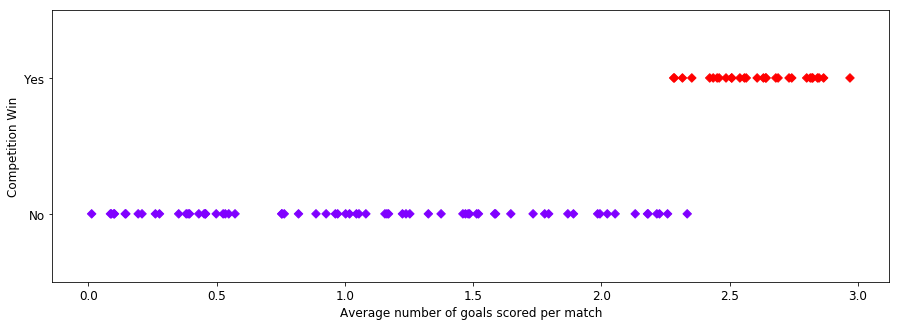

In [10]:
###
# REPLACE <addWonCompetition> BELOW WITH 'won_competition' (INCLUDING THE QUOTES)
###
train_Y = dataset['won_competition']
###

###
# REPLACE <addAverageGoals> BELOW WITH 'average_goals_per_match' (INCLUDING THE QUOTES)
###
train_X = dataset['average_goals_per_match']
###

# The 'won_competition' will be displayed on the vertical axis (y axis)
# The 'average_goals_per_match' will be displayed on the horizontal axis (x axis)

graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')

graph.yticks([0, 1], ['No', 'Yes'])
graph.ylabel("Competition Win")
graph.ylim([-0.5, 1.5])
graph.xlabel("Average number of goals scored per match")

graph.show()

We can see from this graph that generally, when our team has a good score average, they tend to win the competition.

Step 3
----

How can we predict whether the team will win this season? Let's apply AI to this problem, by making a logisitic regression model using this data and then graph it. This will tell us whether we will likely win this season.

#### Below replace `&lt;buildlinearregression&gt;` with `linear_model.LogisticRegression()` and then __run the code__.&lt;/buildlinearregression&gt;

In [18]:
import numpy as np
from sklearn import linear_model

# Here we build a logistic regression model

###
# REPLACE <buildLinearRegression> BELOW WITH linear_model.LogisticRegression() TO BUILD A LOGISTIC REGRESSION MODEL
###
clf = linear_model.LogisticRegression(C=200)
###

# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_X[:, np.newaxis], train_Y)

# This works out the loss
def sigmoid(train_X):
    return 1 / (1 + np.exp(-train_X))
X_test = np.linspace(0, 3, 300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

Alright, that's the model done. Now __run the code__ below to graph it.

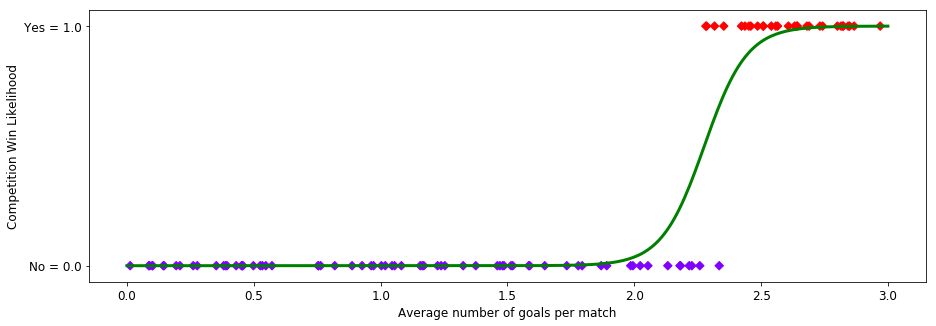

In [19]:
# This makes the graph
# The data points
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
# The curve
graph.plot(X_test, loss, color = 'green', linewidth = 3)
# Define the y-axis
graph.yticks([0, 1], ['No = 0.0', 'Yes = 1.0'])
graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

We now have a line fit to our data. This yellow line is our logistic regression model.

Step 4
------

We can read the model above like so:
* Take the average number of goals per match for the current year. Let's say it is 2.5.
* Find 2.5 on the x-axis. 
* What value (on the y axis) does the line have at x=2.5?
* If this value is above 0.5, then the model thinks our team will win this year. If it is less than 0.5, it thinks our team will lose.

Because this line is just a mathematical function (equation) we don't have to do this visually.

In the exercise below, __choose the number of goals you want to evaluate__.

The code will calculate the probability that our team will win with your chosen number of goals in the match.

### In the cell below replace:
#### 1. `&lt;numberofgoals&gt;` with the number of goals in a year (any number from 0 to 3)
#### 2. `&lt;replacewithp&gt;` with `p`
#### then __run the code__.&lt;/replacewithp&gt;&lt;/numberofgoals&gt;

Probability of winning this year
93.44070298260628%


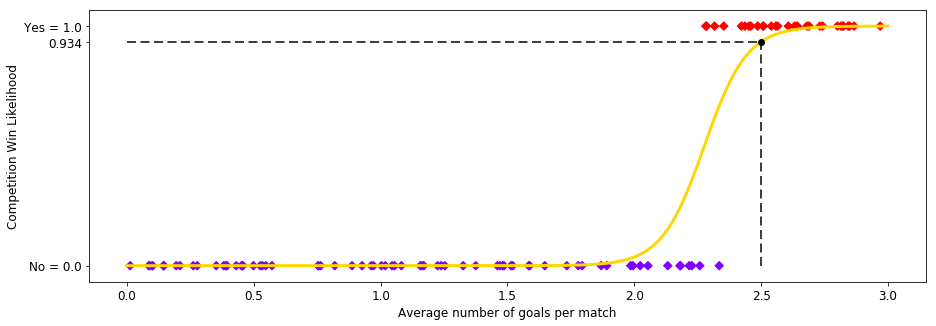

In [24]:
###
# REPLACE <numberOfGoals> BELOW WITH THE NUMBER OF GOALS IN A MATCH THIS YEAR. USE ANY NUMBER FROM 0 TO 3
###
p = 2.5
###

# Next we're going to use our model again - clf is the name of our model.
# We'll use a method to predict the probability of a positive result
# Use the variable p which we just made in this method.

###
# REPLACE <replaceWithP> BELOW WITH p TO PREDICT USING THIS VALUE
###
probOfWinning = clf.predict_proba([[ p ]])[0][1]
###

# This prints out the result
print("Probability of winning this year")
print(str(probOfWinning * 100) + "%")

# This plots the result
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning,3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') # result point
graph.plot(np.linspace(0, p, 2), np.full([2],probOfWinning), dashes = [6, 3], color = 'black') # dashed lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2), dashes = [6, 3], color = 'black') # dashed lines (to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

Conclusion
-----

Well done! We have calculated the likelihood that our team will win this year's competition.

You can go back to the course now and click __'Next Step'__ 

Optional: Step 5
-----

Of course, these predictions are only one model.

Let's return to what we did in step 3, but we'll replace `linear_model.LogisticRegression()` with `linear_model.LogisticRegression(C=200)`. This will tell the model to make a steeper decision boundary. Then repeat Step 4 with this boundary. Did your results change?

There are methods we can use to choose sensible parameters for many models. This is currently outside the scope of this course, but it is important to remember that a model is only as good as the data we give it, the parameters we choose, and the assumptions we make.

#### Follow the instructions in the cell below to replace `&lt;numberofgoals&gt;` and `&lt;buildlinearregression&gt;` and __run the code__.&lt;/buildlinearregression&gt;&lt;/numberofgoals&gt;

In [4]:
# Let's do that again.
# We will repeat what we did in step 3, but change the decision boundary.

import numpy as np
from sklearn import linear_model

###
# REPLACE THE <numberOfGoals> WITH THE NUMBER OF GOALS YOU WANT TO EVALUATE
###
p = <numberOfGoals>
###

# Here we build the new logistic regression model.
# The C=200 is where we change the decision boundary.
###
# REPLACE <buildLinearRegression> BELOW WITH linear_model.LogisticRegression(C=200) TO BUILD A LOGISTIC REGRESSION MODEL
###
clf = <buildLinearRegression>
###

# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_X[:, np.newaxis], train_Y)

# This works out the loss
def sigmoid(train_X):
    return 1 / (1 + np.exp(-train_X))
X_test = np.linspace(0, 3, 300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

# This makes the prediction for your chosen number of goals.
probOfWinning = clf.predict_proba([[p]])[0][1]

# This prints out the result.
print("Probability of winning this year")
print(str(probOfWinning * 100) + "%")

# This plots the result.
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning,3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') # result point
graph.plot(np.linspace(0, p, 2), np.full([2],probOfWinning), dashes = [6, 3], color = 'black') # dashed lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2), dashes = [6, 3], color = 'black') # dashed lines (to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

SyntaxError: invalid syntax (<ipython-input-4-4cb10621b735>, line 10)